In [2]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from collections import Counter
import warnings
matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
%matplotlib inline


/Users/weiruchen/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
transaction_df = pd.read_csv('data-samples/transaction_25025.csv', index_col=0)
transaction_df.head()

,firstamericanuniquetransactionid,propertyuniqueid_oldtype,fipscode,apn,apnsequencenbr,previousparcelnumber,matchedflag,housenumber,housenumber2,housenumbersuffix,directionleft,streetname,suffix,directionright,unittype,unitnumber,city,state,zipcode,buyernameborrowername1,owneretalind,ownercareofname,corporateindicator2,buyernameborrowername2,ownershiprightscode2,ownerrelationshiptype2,buyer1lastname,buyer1firstname,buyer1middlename,buyer1suffix,buyer2lastname,buyer2firstname,buyer2middlename,buyer2suffix,mailhousenumber,mailhousenumber2,mailhousenumbersuffix,maildirectionleft,mailstreetname,mailmode,maildirectionright,mailunittype,mailunitnumber,mailcity,mailstate,mailzipcode,mailzipplus4,mailcarriercode,recordingdate,saledate,documentnumber,recordingbook,recordingpage,documenttype,transactiontype,sellername,sellernamecorpindicator,sellername2,sellername2corpindicator,saleamount,salespricecode,resaleflag,newconstructionflag,interfamilyflag,forclosureflag,reosaleflag,firstmortgagerecordingdate,firstmortgagedocdate,firstmortgagedocumentnumber,firstmortgagerecordingbook,firstmortgagerecordingpage,firstmortgagedetaileddocumenttype,firstmortgagemortgageamount,firstmortgagelendername,firstmortgageloantypecode,firstmortgagedetailedloantype,firstmortgagetermcode,firstmortgageterm,firstmortgageduedate,firstmortgageinterestratetype,firstmortgageinterestrate,firstmortgagesellercarrybackflag,firstmortgageprivatepartylender,firstmortgageconstructionloan,firstmortgagerefiflag,firstmortgageequityflag,firstmortgagehelocflag,firstmortgageothersubordinateloanflag,firstmortgagesecondhomerider,firstmortgagecondominiumrider,firstmortgagemultifamily4rider,firstmortgageplannedunitdevelopmentrider,firstmortgageassumabilityrider,firstmortgageballoonrider,firstmortgagerateimprovementrider,firstmortgagechangeindex,firstmortgagefirstchangedatemonthday,firstmortgagefirstchangedateyear,firstmortgageinterestonlyperiod,firstmortgagemaximuminterestrate,firstmortgageminimuminterestrate,firstmortgageratechangefrequency,secondmortgagerecordingdate,secondmortgagedocdate,secondmortgagedocumentnumber,secondmortgagerecordingbook,secondmortgagerecordingpage,secondmortgagedetaileddocumenttype,secondmortgageamount,secondmortgagelendername,secondmortgageloantypecode,secondmortgagedetailedloantype,secondmortgagetermcode,secondmortgageterm,secondmortgageduedate,secondmortgageinterestratetype,secondmortgageinterestrate,secondmortgagesellercarryback,secondmortgageprivatepartylender,secondmortgageconstructionloan,secondmortgagerefiflag,secondmortgageequityflag,secondmortgagehelocflag,secondmortgageothersubordinateloanflag,secondmortgagesecondhomerider,secondmortgagecondominiumrider,secondmortgagemultifamily4rider,secondmortgageplannedunitdevelopmentrider,secondmortgageassumabilityrider,secondmortgageballoonrider,secondmortgagebiweeklypaymentrider,secondmortgagefixedstepraterider,secondmortgagegraduatedpaymentrider,secondmortgageprepaymentrider,secondmortgagerateimprovementrider,secondmortgagechangeindex,secondmortgagefirstchangedatemonthday,secondmortgagefirstchangedateyear,secondmortgageinterestonlyperiod,secondmortgagemaximuminterestrate,secondmortgageminimuminterestrate,secondmortgageratechangefrequency,block,lotnumber,firstmortgagebiweeklypaymentrider,landlot,ucid,assessorsmapref,multiapn,transfertax,taxaccountnumber,section,district,unit,lotcode,hawaiilandcourtdocumentnumber,updatetimestamp,partialinterestindicatorflag,subdivisionname,zipplus4,firstmortgagefixedstepraterider,firstmortgagegraduatedpaymentrider,tractno,waexcisenumber,titlecompanyname,secondmortgageadjustableraterider,sectwnrngmer,citymunicipalitytownship,firstmortgageadjustablerateindex,legaldescription,firstmortgageadjustableraterider,hawaiitctcertificatenumber,ownerrelationshiptype1,firstmortgageprepaymentrider,phaseno,carriercode,corporateindicator,secondmortgageadjustablerateindex,ownershiprightscode1,ownerstd1relationshiptype,propertyuniqueid
0,2093082488,NaN,25025,SBOS W:06 P:03228 S:000,NaN,NaN,Y,5

In [4]:
print(list(transaction_df.columns))

['firstamericanuniquetransactionid', 'propertyuniqueid_oldtype', 'fipscode', 'apn', 'apnsequencenbr', 'previousparcelnumber', 'matchedflag', 'housenumber', 'housenumber2', 'housenumbersuffix', 'directionleft', 'streetname', 'suffix', 'directionright', 'unittype', 'unitnumber', 'city', 'state', 'zipcode', 'buyernameborrowername1', 'owneretalind', 'ownercareofname', 'corporateindicator2', 'buyernameborrowername2', 'ownershiprightscode2', 'ownerrelationshiptype2', 'buyer1lastname', 'buyer1firstname', 'buyer1middlename', 'buyer1suffix', 'buyer2lastname', 'buyer2firstname', 'buyer2middlename', 'buyer2suffix', 'mailhousenumber', 'mailhousenumber2', 'mailhousenumbersuffix', 'maildirectionleft', 'mailstreetname', 'mailmode', 'maildirectionright', 'mailunittype', 'mailunitnumber', 'mailcity', 'mailstate', 'mailzipcode', 'mailzipplus4', 'mailcarriercode', 'recordingdate', 'saledate', 'documentnumber', 'recordingbook', 'recordingpage', 'documenttype', 'transactiontype', 'sellername', 'sellernamec

In [5]:
transaction_df.describe()

,firstamericanuniquetransactionid,propertyuniqueid_oldtype,fipscode,apnsequencenbr,previousparcelnumber,housenumber2,housenumbersuffix,zipcode,owneretalind,ownercareofname,mailhousenumber2,mailhousenumbersuffix,mailzipcode,mailzipplus4,documentnumber,recordingbook,recordingpage,transactiontype,saleamount,salespricecode,interfamilyflag,firstmortgagerecordingbook,firstmortgagerecordingpage,firstmortgagemortgageamount,firstmortgageloantypecode,firstmortgagedetailedloantype,firstmortgageterm,firstmortgageinterestrate,firstmortgagesecondhomerider,firstmortgagecondominiumrider,firstmortgagemultifamily4rider,firstmortgageplannedunitdevelopmentrider,firstmortgageassumabilityrider,firstmortgageballoonrider,firstmortgagerateimprovementrider,firstmortgagechangeindex,firstmortgagefirstchangedatemonthday,firstmortgagefirstchangedateyear,firstmortgageinterestonlyperiod,firstmortgagemaximuminterestrate,firstmortgageminimuminterestrate,firstmortgageratechangefrequency,secondmortgagedocumentnumber,secondmortgagerecordingbook,secondmortgagerecordingpage,secondmortgageamount,secondmortgageloantypecode,secondmortgagedetailedloantype,secondmortgageterm,secondmortgageduedate,secondmortgageinterestrate,secondmortgagesellercarryback,secondmortgageconstructionloan,secondmortgagerefiflag,secondmortgagehelocflag,secondmortgagesecondhomerider,secondmortgagecondominiumrider,secondmortgagemultifamily4rider,secondmortgageplannedunitdevelopmentrider,secondmortgageassumabilityrider,secondmortgageballoonrider,secondmortgagebiweeklypaymentrider,secondmortgagefixedstepraterider,secondmortgagegraduatedpaymentrider,secondmortgageprepaymentrider,secondmortgagerateimprovementrider,secondmortgagechangeindex,secondmortgagefirstchangedatemonthday,secondmortgagefirstchangedateyear,secondmortgageinterestonlyperiod,secondmortgagemaximuminterestrate,secondmortgageminimuminterestrate,secondmortgageratechangefrequency,block,lotnumber,firstmortgagebiweeklypaymentrider,assessorsmapref,multiapn,transfertax,taxaccountnumber,section,district,unit,hawaiilandcourtdocumentnumber,partialinterestindicatorflag,zipplus4,firstmortgagefixedstepraterider,firstmortgagegraduatedpaymentrider,tractno,waexcisenumber,secondmortgageadjustableraterider,sectwnrngmer,firstmortgageadjustableraterider,hawaiitctcertificatenumber,firstmortgageprepaymentrider,phaseno,secondmortgageadjustablerateindex,ownerstd1relationshiptype,propertyuniqueid
count,3.931680e+05,0.0,393168.0,0.0,0.0,0.0,0.0,392500.000000,0.0,0.0,0.0,0.0,40974.000000,39791.000000,3.440430e+05,380914.000000,380914.000000,392509.000000,1.958290e+05,171372.000000,0.0,258772.00000,258772.000000,3.930890e+05,288879.000000,137045.000000,228718.000000,393089.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10727.000000,4136.000000,4136.000000,0.0,11735.000000,11180.000000,0.0,2515.000000,3044.000000,3044.000000,1.954690e+05,454.000000,191.000000,340.000000,1.540000e+02,456.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24005.0,1.956350e+05,0.0,0.0,0.0,0.0,0.0,6.0,363773.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.756740e+05
mean,5.177343e+09,NaN,25025.0,NaN,NaN,NaN,NaN,2130.672854,NaN,NaN,NaN,NaN,2997.602919,3123.300596,2.019401e+03,49577.747980,165.928446,2.131184,7.475159e+05,12.370317,NaN,49675.08761,159.148652,8.022366e+05,2.433638,18.691853,334.111946,323.179224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.377552,607.421663,26.925774,NaN,237.560290,120.282379,NaN,2043.175096,51239.458936,166.247043,2.772159e+03,2.834802,20.251309,342.908824,2.039576e+07,429.370614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,260.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.790754e+03,NaN,NaN,NaN,NaN,NaN,3.0,3119.323696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.933934e+07
std,6.598474e+09,NaN,0.0,NaN,NaN,NaN,NaN,20.798364,NaN,NaN,NaN,NaN,7574.199822,1553.126937,2.311369e+03,14021.596173,100.999248,1.049253,7.712513e+06,2.787024,NaN,14020.53945,100.123480,1.057523e+07,1.1424

#### clean data

In [6]:
# remove all columns that are completely filled with NAs
drop_columns = ['propertyuniqueid_oldtype','apnsequencenbr','previousparcelnumber','housenumber2','housenumbersuffix',
                'owneretalind','ownercareofname','mailhousenumber2','mailhousenumbersuffix','interfamilyflag',
                'firstmortgagesecondhomerider','firstmortgagecondominiumrider','firstmortgagemultifamily4rider',
                'firstmortgageplannedunitdevelopmentrider','firstmortgageassumabilityrider','firstmortgageballoonrider',
                'firstmortgagerateimprovementrider','firstmortgageinterestonlyperiod','firstmortgageratechangefrequency',
                'secondmortgagesellercarryback','secondmortgageconstructionloan','secondmortgagerefiflag',
                'secondmortgagehelocflag','secondmortgagesecondhomerider','secondmortgagecondominiumrider',
                'secondmortgagemultifamily4rider','secondmortgageplannedunitdevelopmentrider','secondmortgageassumabilityrider',
                'secondmortgageballoonrider','secondmortgagebiweeklypaymentrider','secondmortgagefixedstepraterider',
                'secondmortgagegraduatedpaymentrider','secondmortgageprepaymentrider','secondmortgagerateimprovementrider',
                'secondmortgagefirstchangedatemonthday','secondmortgagefirstchangedateyear','secondmortgageinterestonlyperiod',
                'secondmortgagemaximuminterestrate','secondmortgageminimuminterestrate','secondmortgageratechangefrequency',
                'block','lotnumber','firstmortgagebiweeklypaymentrider','assessorsmapref','taxaccountnumber',
                'section','district','unit','hawaiilandcourtdocumentnumber','firstmortgagefixedstepraterider',
                'firstmortgagegraduatedpaymentrider','tractno','waexcisenumber','secondmortgageadjustableraterider',
                'sectwnrngmer','firstmortgageadjustableraterider','hawaiitctcertificatenumber','firstmortgageprepaymentrider',
                'phaseno','secondmortgageadjustablerateindex','ownerstd1relationshiptype']

In [7]:
transaction_df = transaction_df.drop(columns=drop_columns)
transaction_df.head()

,firstamericanuniquetransactionid,fipscode,apn,matchedflag,housenumber,directionleft,streetname,suffix,directionright,unittype,unitnumber,city,state,zipcode,buyernameborrowername1,corporateindicator2,buyernameborrowername2,ownershiprightscode2,ownerrelationshiptype2,buyer1lastname,buyer1firstname,buyer1middlename,buyer1suffix,buyer2lastname,buyer2firstname,buyer2middlename,buyer2suffix,mailhousenumber,maildirectionleft,mailstreetname,mailmode,maildirectionright,mailunittype,mailunitnumber,mailcity,mailstate,mailzipcode,mailzipplus4,mailcarriercode,recordingdate,saledate,documentnumber,recordingbook,recordingpage,documenttype,transactiontype,sellername,sellernamecorpindicator,sellername2,sellername2corpindicator,saleamount,salespricecode,resaleflag,newconstructionflag,forclosureflag,reosaleflag,firstmortgagerecordingdate,firstmortgagedocdate,firstmortgagedocumentnumber,firstmortgagerecordingbook,firstmortgagerecordingpage,firstmortgagedetaileddocumenttype,firstmortgagemortgageamount,firstmortgagelendername,firstmortgageloantypecode,firstmortgagedetailedloantype,firstmortgagetermcode,firstmortgageterm,firstmortgageduedate,firstmortgageinterestratetype,firstmortgageinterestrate,firstmortgagesellercarrybackflag,firstmortgageprivatepartylender,firstmortgageconstructionloan,firstmortgagerefiflag,firstmortgageequityflag,firstmortgagehelocflag,firstmortgageothersubordinateloanflag,firstmortgagechangeindex,firstmortgagefirstchangedatemonthday,firstmortgagefirstchangedateyear,firstmortgagemaximuminterestrate,firstmortgageminimuminterestrate,secondmortgagerecordingdate,secondmortgagedocdate,secondmortgagedocumentnumber,secondmortgagerecordingbook,secondmortgagerecordingpage,secondmortgagedetaileddocumenttype,secondmortgageamount,secondmortgagelendername,secondmortgageloantypecode,secondmortgagedetailedloantype,secondmortgagetermcode,secondmortgageterm,secondmortgageduedate,secondmortgageinterestratetype,secondmortgageinterestrate,secondmortgageprivatepartylender,secondmortgageequityflag,secondmortgageothersubordinateloanflag,secondmortgagechangeindex,landlot,ucid,multiapn,transfertax,lotcode,updatetimestamp,partialinterestindicatorflag,subdivisionname,zipplus4,titlecompanyname,citymunicipalitytownship,firstmortgageadjustablerateindex,legaldescription,ownerrelationshiptype1,carriercode,corporateindicator,ownershiprightscode1,propertyuniqueid
0,2093082488,25025,SBOS W:06 P:03228 S:000,Y,549,E,3RD,ST,NaN,NaN,NaN,SOUTH BOSTON,MA,2127.0,GEARHART JILL,NaN,NaN,NaN,NaN,GEARHART,JILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.120657,42675.0,55.0,93,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.120657,42675.0,55.0,MG,25000.0,BANK OF AMERICA NA,2.0,NaN,NaN,NaN,NaN,NaN,643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,2019-05-15,NaN,NaN,1761.0,NaN,SOUTH BOSTON,NaN,NaN,NaN,C004,NaN,NaN,66811160.0
1,2093087219,25025,SBOS W:07 P:00142 S:000,Y,1,NaN,GLOVER,CT,NaN,NaN,NaN,SOUTH BOSTON,MA,2127.0,CLEVELAND KIMBALL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.120651,42674.0,340.0,93,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.120651,42674.0,340.0,MG,20000.0,SOVEREIGN BANK,2.0,NaN,NaN,NaN,NaN,NaN,643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,NaN,NaN,NaN,2019-07-31,NaN,NaN,7465.0,NaN,SOUTH BOSTON,NaN,NaN,NaN,C016,Y,NaN,66803686.0
2,2091336828,25025,ROSL W:18 P:04631 S:000,Y,35,NaN,AUGUSTUS,AVE,NaN,NaN,NaN,ROSLINDALE,MA,2131.0,CATALDO GENNARO F,NaN,NaN,NaN,NaN,CATALDO,GENNARO,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.121078,42680.0,262.0,93,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,NaN,2007.121078,42680.0,262.0,MG,150000.0,RBS CITIZENS NA,2.0,NaN,NaN,NaN,NaN,Na

In [8]:
transaction_df.describe()

,firstamericanuniquetransactionid,fipscode,zipcode,mailzipcode,mailzipplus4,documentnumber,recordingbook,recordingpage,transactiontype,saleamount,salespricecode,firstmortgagerecordingbook,firstmortgagerecordingpage,firstmortgagemortgageamount,firstmortgageloantypecode,firstmortgagedetailedloantype,firstmortgageterm,firstmortgageinterestrate,firstmortgagechangeindex,firstmortgagefirstchangedatemonthday,firstmortgagefirstchangedateyear,firstmortgagemaximuminterestrate,firstmortgageminimuminterestrate,secondmortgagedocumentnumber,secondmortgagerecordingbook,secondmortgagerecordingpage,secondmortgageamount,secondmortgageloantypecode,secondmortgagedetailedloantype,secondmortgageterm,secondmortgageduedate,secondmortgageinterestrate,secondmortgagechangeindex,multiapn,transfertax,partialinterestindicatorflag,zipplus4,propertyuniqueid
count,3.931680e+05,393168.0,392500.000000,40974.000000,39791.000000,3.440430e+05,380914.000000,380914.000000,392509.000000,1.958290e+05,171372.000000,258772.00000,258772.000000,3.930890e+05,288879.000000,137045.000000,228718.000000,393089.000000,10727.000000,4136.000000,4136.000000,11735.000000,11180.000000,2515.000000,3044.000000,3044.000000,1.954690e+05,454.000000,191.000000,340.000000,1.540000e+02,456.000000,10.000000,24005.0,1.956350e+05,6.0,363773.000000,3.756740e+05
mean,5.177343e+09,25025.0,2130.672854,2997.602919,3123.300596,2.019401e+03,49577.747980,165.928446,2.131184,7.475159e+05,12.370317,49675.08761,159.148652,8.022366e+05,2.433638,18.691853,334.111946,323.179224,262.377552,607.421663,26.925774,237.560290,120.282379,2043.175096,51239.458936,166.247043,2.772159e+03,2.834802,20.251309,342.908824,2.039576e+07,429.370614,260.000000,1.0,4.790754e+03,3.0,3119.323696,6.933934e+07
std,6.598474e+09,0.0,20.798364,7574.199822,1553.126937,2.311369e+03,14021.596173,100.999248,1.049253,7.712513e+06,2.787024,14020.53945,100.123480,1.057523e+07,1.142423,7.772439,70.597072,193.635776,159.917054,319.755303,2.492369,71.387683,125.548186,1227.315592,9263.664912,98.407007,2.808407e+05,1.614374,7.527472,61.200627,7.210597e+04,66.426103,96.609178,0.0,5.250545e+04,0.0,1525.416236,1.514819e+07
min,1.051688e+09,25025.0,1906.000000,901.000000,1.000000,4.300000e+02,0.000000,0.000000,1.000000,0.000000e+00,2.000000,0.00000,0.000000,0.000000e+00,1.000000,2.000000,12.000000,0.000000,10.000000,101.000000,9.000000,0.000000,10.000000,2007.121830,15.000000,1.000000,0.000000e+00,1.000000,2.000000,36.000000,2.016060e+07,300.000000,200.000000,1.0,0.000000e+00,3.0,2.000000,6.662855e+07
25%,1.184160e+09,25025.0,2121.000000,2121.000000,1915.000000,2.012110e+03,46632.000000,79.000000,2.000000,0.000000e+00,11.000000,47291.00000,73.000000,1.500000e+04,2.000000,12.000000,360.000000,300.000000,200.000000,301.000000,26.000000,200.000000,24.000000,2014.186250,48161.750000,81.000000,0.000000e+00,2.000000,21.000000,360.000000,2.041020e+07,388.000000,200.000000,1.0,0.000000e+00,3.0,1914.000000,6.668086e+07
50%,2.091268e+09,25025.0,2128.000000,2128.000000,2864.000000,2.014992e+03,52021.500000,163.000000,2.000000,2.950000e+05,14.000000,52261.00000,156.000000,2.323150e+05,2.000000,22.000000,360.000000,383.000000,225.000000,601.000000,26.000000,225.000000,170.000000,2015.359580,53523.000000,165.000000,0.000000e+00,2.000000,21.000000,360.000000,2.041080e+07,421.000000,200.000000,1.0,1.978000e+03,3.0,2905.000000,6.672832e+07
75%,2.865932e+09,25025.0,2134.000000,2136.000000,4012.000000,2.017877e+03,57756.000000,252.000000,2.000000,5.500000e+05,14.000000,57399.00000,244.000000,4.000000e+05,2.000000,24.000000,360.000000,441.000000,300.000000,901.000000,29.000000,300.000000,200.000000,2016.518555,55812.750000,250.000000,0.000000e+00,2.000000,27.000000,360.000000,2.043018e+07,474.000000,350.000000,1.0,4.702000e+03,3.0,4014.000000,6.677844e+07
max,2.118095e+10,25025.0,2467.000000,99701.000000,9812.000000,1.351491e+06,75118.000000,988.000000,9.000000,9.300000e+08,43.000000,73872.00000,932.000000,1.000000e+09,6.000000,34.000000,999.000000,1200.000000,1410.0

In [9]:
print(list(transaction_df.columns))

['firstamericanuniquetransactionid', 'fipscode', 'apn', 'matchedflag', 'housenumber', 'directionleft', 'streetname', 'suffix', 'directionright', 'unittype', 'unitnumber', 'city', 'state', 'zipcode', 'buyernameborrowername1', 'corporateindicator2', 'buyernameborrowername2', 'ownershiprightscode2', 'ownerrelationshiptype2', 'buyer1lastname', 'buyer1firstname', 'buyer1middlename', 'buyer1suffix', 'buyer2lastname', 'buyer2firstname', 'buyer2middlename', 'buyer2suffix', 'mailhousenumber', 'maildirectionleft', 'mailstreetname', 'mailmode', 'maildirectionright', 'mailunittype', 'mailunitnumber', 'mailcity', 'mailstate', 'mailzipcode', 'mailzipplus4', 'mailcarriercode', 'recordingdate', 'saledate', 'documentnumber', 'recordingbook', 'recordingpage', 'documenttype', 'transactiontype', 'sellername', 'sellernamecorpindicator', 'sellername2', 'sellername2corpindicator', 'saleamount', 'salespricecode', 'resaleflag', 'newconstructionflag', 'forclosureflag', 'reosaleflag', 'firstmortgagerecordingdate

#### feature selection

In [10]:
print(dict(transaction_df.isna().sum()))

{'firstamericanuniquetransactionid': 0, 'fipscode': 0, 'apn': 5415, 'matchedflag': 5356, 'housenumber': 811, 'directionleft': 366469, 'streetname': 327, 'suffix': 7807, 'directionright': 392087, 'unittype': 225229, 'unitnumber': 225071, 'city': 326, 'state': 326, 'zipcode': 668, 'buyernameborrowername1': 22, 'corporateindicator2': 392533, 'buyernameborrowername2': 237583, 'ownershiprightscode2': 391158, 'ownerrelationshiptype2': 284604, 'buyer1lastname': 84983, 'buyer1firstname': 85886, 'buyer1middlename': 222397, 'buyer1suffix': 387422, 'buyer2lastname': 237971, 'buyer2firstname': 238083, 'buyer2middlename': 308704, 'buyer2suffix': 392632, 'mailhousenumber': 352113, 'maildirectionleft': 390439, 'mailstreetname': 351975, 'mailmode': 352854, 'maildirectionright': 393043, 'mailunittype': 372787, 'mailunitnumber': 372811, 'mailcity': 351966, 'mailstate': 351965, 'mailzipcode': 352194, 'mailzipplus4': 353377, 'mailcarriercode': 354175, 'recordingdate': 0, 'saledate': 336733, 'documentnumbe

In [11]:
directionleft_counter = Counter(list(transaction_df.directionleft))
print('column of directionleft:', directionleft_counter)

directionright_counter = Counter(list(transaction_df.directionright))
print('column of directionright:', directionright_counter)

column of directionleft: Counter({nan: 366469, 'E': 13361, 'W': 10514, 'N': 1764, 'S': 1060})
column of directionright: Counter({nan: 392087, 'S': 574, 'E': 419, 'W': 55, 'N': 32, 'NE': 1})


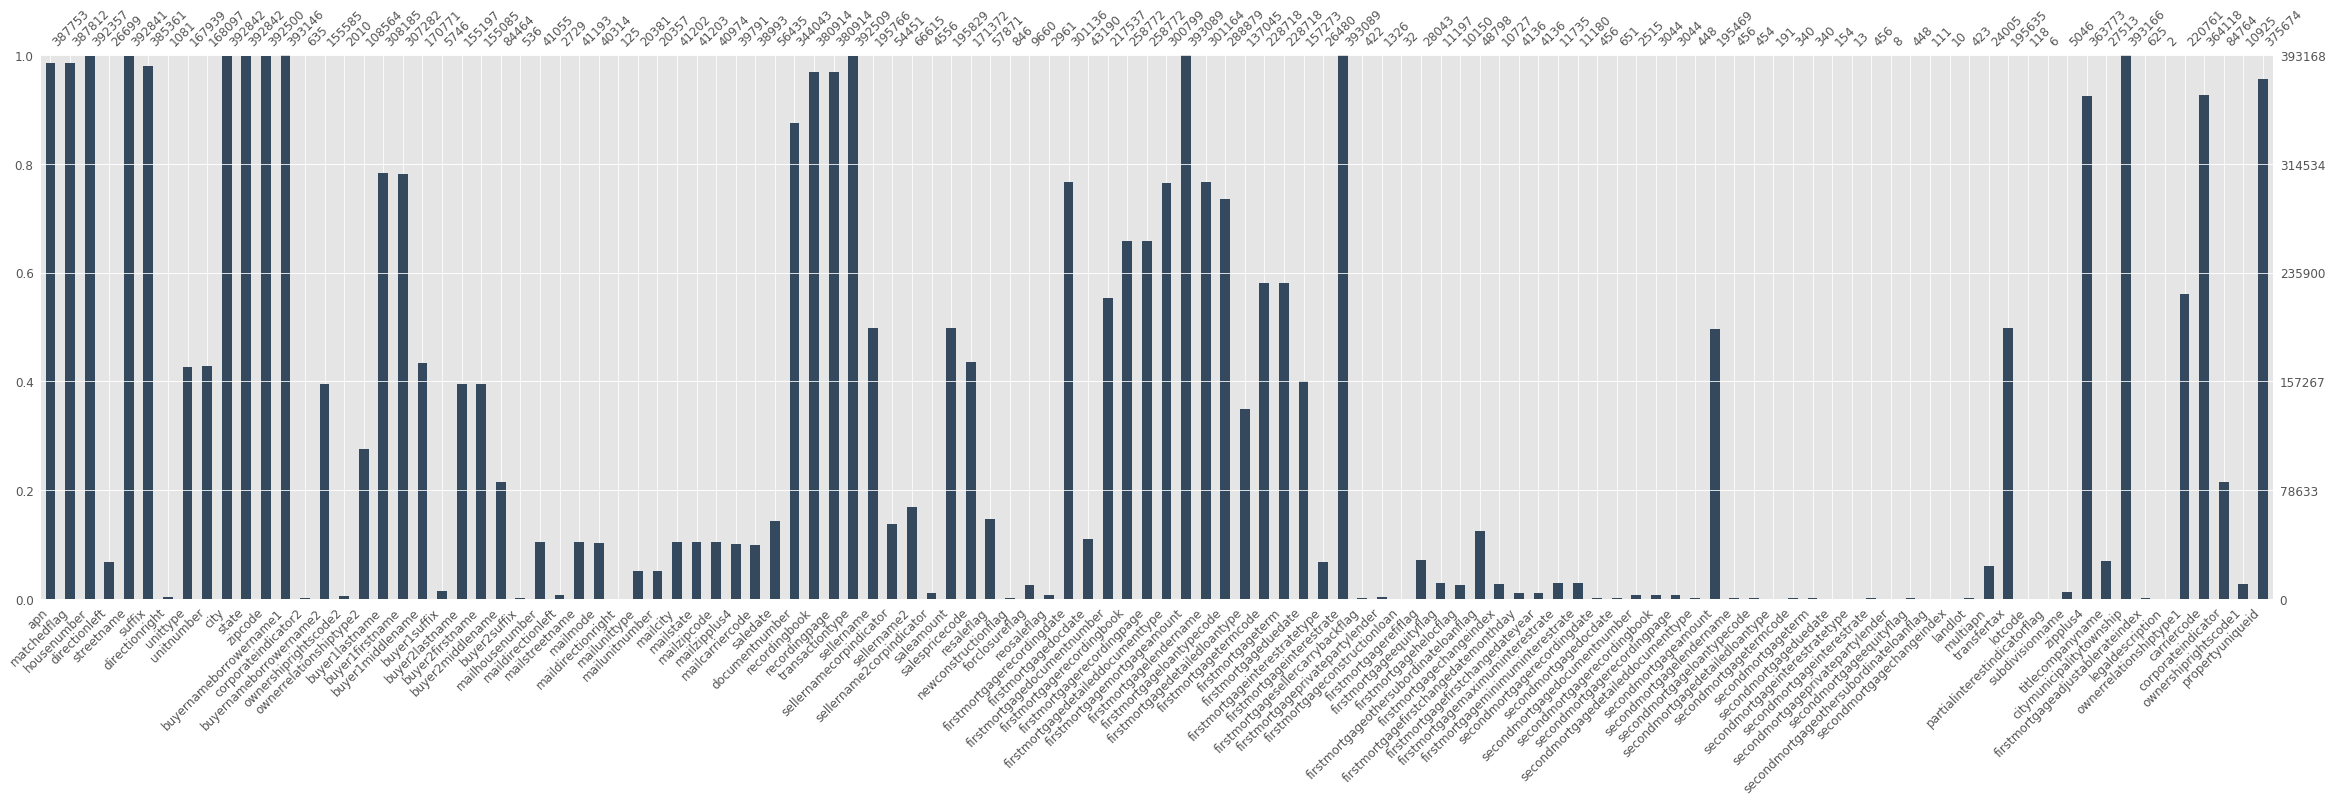

In [12]:
# missing value analysis
missingValueColumns = transaction_df.columns[transaction_df.isnull().any()].tolist()
msno.bar(transaction_df[missingValueColumns],\
            figsize=(40,10),color="#34495e",fontsize=12,labels=True,)


In [13]:
# remove sensitive information unrelated to buying interests
drop_sensitive = ['buyer1lastname','buyer1firstname','buyer1middlename','buyer1suffix','buyer2lastname','buyer2firstname',
                  'buyer2middlename','buyer2suffix','sellername','sellername2']

# remove columns with large number of NAs
drop_na = ['directionleft','directionright','unittype','unitnumber','corporateindicator2','buyernameborrowername2',
           'ownershiprightscode2','ownerrelationshiptype2','mailhousenumber','maildirectionleft','mailstreetname',
           'mailmode','maildirectionright','mailunittype','mailunitnumber','mailcity','mailstate', 'mailzipcode',
           'mailzipplus4', 'mailcarriercode','saledate','sellernamecorpindicator','sellername2corpindicator',
           'saleamount','salespricecode','resaleflag','newconstructionflag','forclosureflag','reosaleflag',
           'firstmortgagedocdate','firstmortgagedetailedloantype','firstmortgageduedate','firstmortgageinterestratetype',
           'firstmortgagesellercarrybackflag','firstmortgageprivatepartylender','firstmortgageconstructionloan',
           'firstmortgagerefiflag','firstmortgageequityflag','firstmortgagehelocflag',
           'firstmortgageothersubordinateloanflag','firstmortgagechangeindex','firstmortgagefirstchangedatemonthday',
           'firstmortgagefirstchangedateyear','firstmortgagemaximuminterestrate','firstmortgageminimuminterestrate',
           'secondmortgagerecordingdate','secondmortgagedocdate','secondmortgagedocumentnumber','secondmortgagerecordingbook',
           'secondmortgagerecordingpage','secondmortgagedetaileddocumenttype','secondmortgageamount',
           'secondmortgagelendername','secondmortgageloantypecode','secondmortgagedetailedloantype',
           'secondmortgagetermcode','secondmortgageterm','secondmortgageduedate','secondmortgageinterestratetype',
           'secondmortgageinterestrate','secondmortgageprivatepartylender','secondmortgageequityflag',
           'secondmortgageothersubordinateloanflag','secondmortgagechangeindex','landlot','multiapn','lotcode',
           'partialinterestindicatorflag','subdivisionname','titlecompanyname','firstmortgageadjustablerateindex',
           'legaldescription','corporateindicator','ownershiprightscode1']

In [14]:
transaction_df = transaction_df.drop(columns=drop_sensitive)
transaction_df = transaction_df.drop(columns=drop_na)
transaction_df.head()

,firstamericanuniquetransactionid,fipscode,apn,matchedflag,housenumber,streetname,suffix,city,state,zipcode,buyernameborrowername1,recordingdate,documentnumber,recordingbook,recordingpage,documenttype,transactiontype,firstmortgagerecordingdate,firstmortgagedocumentnumber,firstmortgagerecordingbook,firstmortgagerecordingpage,firstmortgagedetaileddocumenttype,firstmortgagemortgageamount,firstmortgagelendername,firstmortgageloantypecode,firstmortgagetermcode,firstmortgageterm,firstmortgageinterestrate,ucid,transfertax,updatetimestamp,zipplus4,citymunicipalitytownship,ownerrelationshiptype1,carriercode,propertyuniqueid
0,2093082488,25025,SBOS W:06 P:03228 S:000,Y,549,3RD,ST,SOUTH BOSTON,MA,2127.0,GEARHART JILL,2007-11-01,2007.120657,42675.0,55.0,93,2.0,2007-11-01,2007.120657,42675.0,55.0,MG,25000.0,BANK OF AMERICA NA,2.0,NaN,NaN,643.0,U,NaN,2019-05-15,1761.0,SOUTH BOSTON,NaN,C004,66811160.0
1,2093087219,25025,SBOS W:07 P:00142 S:000,Y,1,GLOVER,CT,SOUTH BOSTON,MA,2127.0,CLEVELAND KIMBALL,2007-11-01,2007.120651,42674.0,340.0,93,2.0,2007-11-01,2007.120651,42674.0,340.0,MG,20000.0,SOVEREIGN BANK,2.0,NaN,NaN,643.0,U,NaN,2019-07-31,7465.0,SOUTH BOSTON,NaN,C016,66803686.0
2,2091336828,25025,ROSL W:18 P:04631 S:000,Y,35,AUGUSTUS,AVE,ROSLINDALE,MA,2131.0,CATALDO GENNARO F,2007-11-01,2007.121078,42680.0,262.0,93,2.0,2007-11-01,2007.121078,42680.0,262.0,MG,150000.0,RBS CITIZENS NA,2.0,NaN,NaN,643.0,U,NaN,2019-04-03,4239.0,ROSLINDALE,NaN,C028,66770360.0
3,2091343143,25025,ROSL W:19 P:03610 S:000,Y,20,SHERWOOD,ST,ROSLINDALE,MA,2131.0,SCHMIDT BARBARA,2007-11-01,2007.120656,42675.0,42.0,93,2.0,2007-11-01,2007.120656,42675.0,42.0,MG,81100.0,BANK OF AMERICA NA,2.0,NaN,NaN,643.0,U,NaN,2019-04-03,3742.0,ROSLINDALE,NaN,C019,66767432.0
4,2091298831,25025,MATT W:18 P:02136 S:000,Y,7,CULBERT,ST,MATTAPAN,MA,2126.0,BRAMBLE ALICE,2007-11-01,2007.121069,42680.0,205.0,93,2.0,2007-11-01,2007.121069,42680.0,205.0,MG,2100.0,BOSTON CITY OF,2.0,NaN,NaN,643.0,U,NaN,2019-04-03,1715.0,MATTAPAN,NaN,C019,66751463.0


In [15]:
transaction_df.suffix = pd.Categorical(transaction_df.suffix)
transaction_df['cat_suffix'] = transaction_df.suffix.cat.codes

transaction_df.city = pd.Categorical(transaction_df.city)
transaction_df['cat_city'] = transaction_df.city.cat.codes

transaction_df.state = pd.Categorical(transaction_df.state)
transaction_df['cat_state'] = transaction_df.state.cat.codes

transaction_df.recordingdate = pd.Categorical(transaction_df.recordingdate)
transaction_df['cat_recordingdate'] = transaction_df.recordingdate.cat.codes

transaction_df.updatetimestamp = pd.Categorical(transaction_df.updatetimestamp)
transaction_df['cat_updatetimestamp'] = transaction_df.updatetimestamp.cat.codes

transaction_df.citymunicipalitytownship = pd.Categorical(transaction_df.citymunicipalitytownship)
transaction_df['cat_citymunicipalitytownship'] = transaction_df.citymunicipalitytownship.cat.codes

transaction_df.carriercode = pd.Categorical(transaction_df.carriercode)
transaction_df['cat_carriercode'] = transaction_df.carriercode.cat.codes

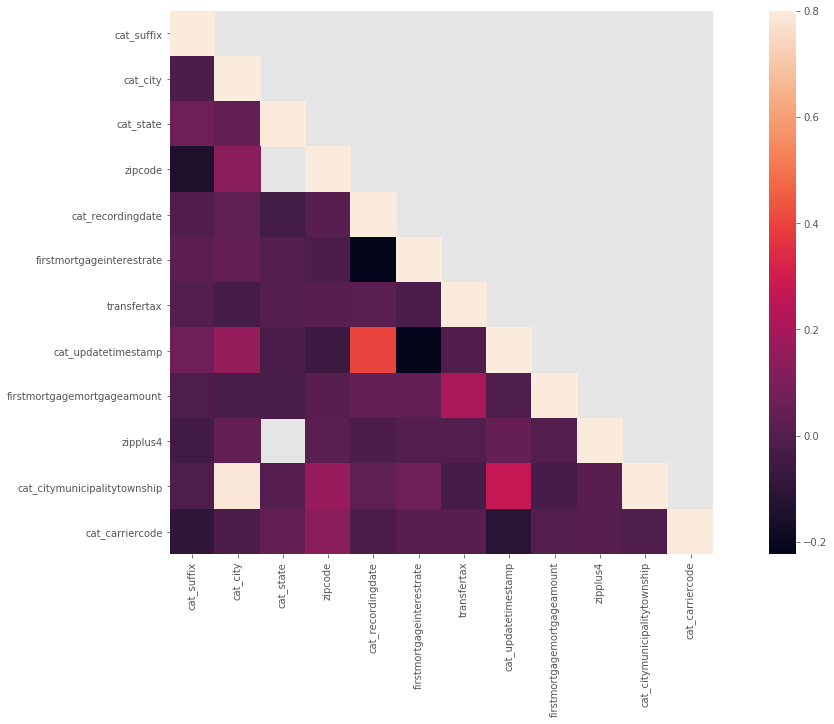

In [21]:
# correlation analysis

# useful features for CF: firstamericanuniquetransactionid, fipscode, suffix, transfer tax, firstmortgageinterestrate,
# city, zipcode, firstmortgagemortgageamount, zipplus4, citymunicipalitytownship, carriercode, propertyuniqueid
features_for_correlation = ['cat_suffix','cat_city','cat_state','zipcode','cat_recordingdate',
                            'firstmortgageinterestrate','transfertax','cat_updatetimestamp',
                            'firstmortgagemortgageamount','zipplus4',
                            'cat_citymunicipalitytownship','cat_carriercode']
corrMatt = transaction_df[features_for_correlation].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True)

The pairs of variables (city, citymunicipalitytownship), (zipcode, state), (zipplus4, state), (updatetimestamp, recordingdate), (updatetimestamp, citymunicipalitytownship) have relatively high correlation. So we can drop some of these variables for smaller representation.

[Text(0, 0.5, 'Features'),
 Text(0.5, 0, 'VIF Scores'),
 Text(0.5, 1.0, 'Variables Which Exhibit Multicollinearity')]

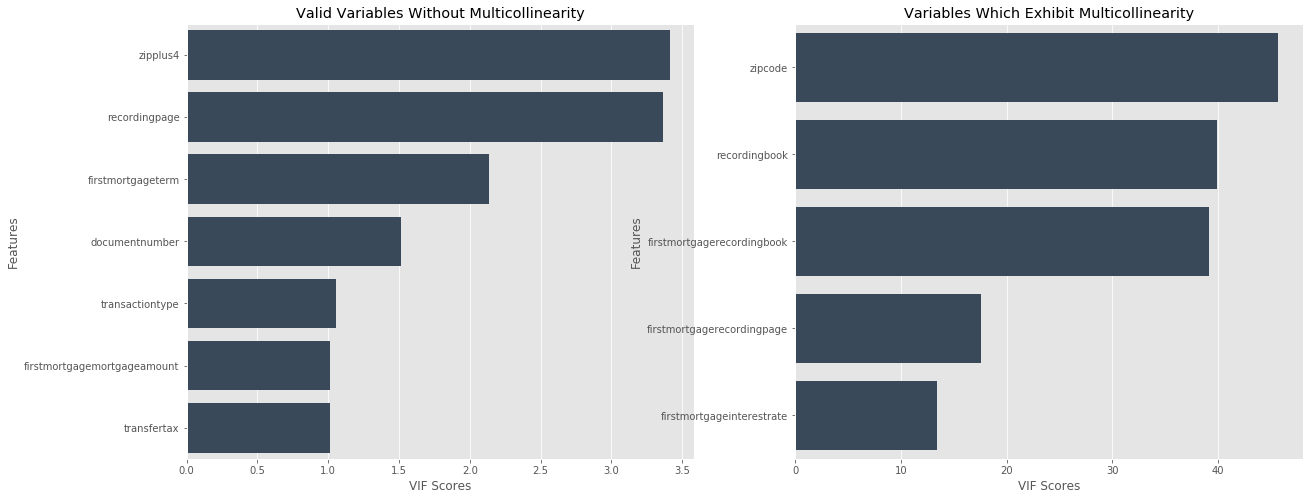

In [20]:
# Multicollinearity Analysis for Numerical Features
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
warnings.filterwarnings("ignore")

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in transaction_df.columns:
    if transaction_df[f].dtype=='float64':
        numericalCol.append(f)
mergedFilterd = transaction_df[numericalCol].fillna(-999)
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sn.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sn.barplot(data=variablesWithMC.head(5),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

#### final selected features for transaction data

In [34]:
useful_features = ['firstamericanuniquetransactionid','fipscode','city','state','zipcode',
                   'firstmortgagemortgageamount',
                   'firstmortgageinterestrate','transfertax',
                   'carriercode','propertyuniqueid']
selected_transaction_df = transaction_df[useful_features]
selected_transaction_df

,firstamericanuniquetransactionid,fipscode,city,state,zipcode,firstmortgagemortgageamount,firstmortgageinterestrate,transfertax,carriercode,propertyuniqueid
0,2093082488,25025,SOUTH BOSTON,MA,2127.0,25000.0,643.0,NaN,C004,66811160.0
1,2093087219,25025,SOUTH BOSTON,MA,2127.0,20000.0,643.0,NaN,C016,66803686.0
2,2091336828,25025,ROSLINDALE,MA,2131.0,150000.0,643.0,NaN,C028,66770360.0
3,2091343143,25025,ROSLINDALE,MA,2131.0,81100.0,643.0,NaN,C019,66767432.0
4,2091298831,25025,MATTAPAN,MA,2126.0,2100.0,643.0,NaN,C019,66751463.0
...,...,...,...,...,...,...,...,...,...,...
393163,11785027150,25025,DORCHESTER,MA,2125.0,600000.0,338.0,0.0,C004,66709464.0
393164,11785027149,25025,DORCHESTER,MA,2125.0,612000.0,290.0,0.0,C005,66678092.0
393165,11785026971,25025,CHELSEA,MA,2150.0,0.0,0.0,0.0,C070,66716566.0
393166,11785026964,25025,BRIGHTON,MA,2135.0,0.0,0.0,0.0,C034,66636832.0


In [78]:
selected_transaction_df.to_csv('processed_data/selected_transaction_25025.csv', index=False)

In [35]:
# EDA (distribution) on transaction dates, tax, interestrate, city, zipcodes, ...

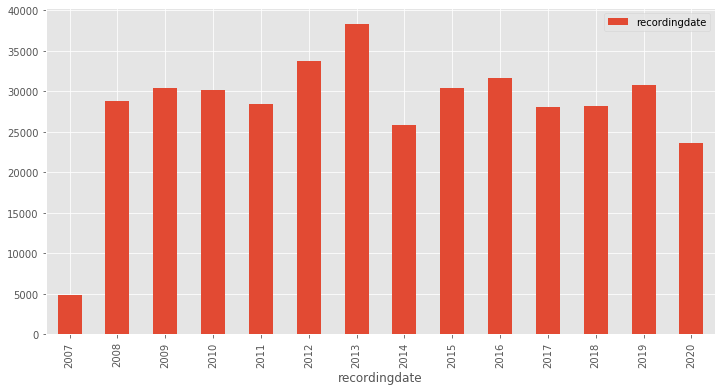

In [52]:
# distribution of data on transaction date
transaction_df.recordingdate = pd.to_datetime(transaction_df.recordingdate, format="%Y-%m-%d")
transaction_df[['recordingdate']].groupby(transaction_df["recordingdate"].dt.year).count().plot(kind="bar",figsize=(12,6))

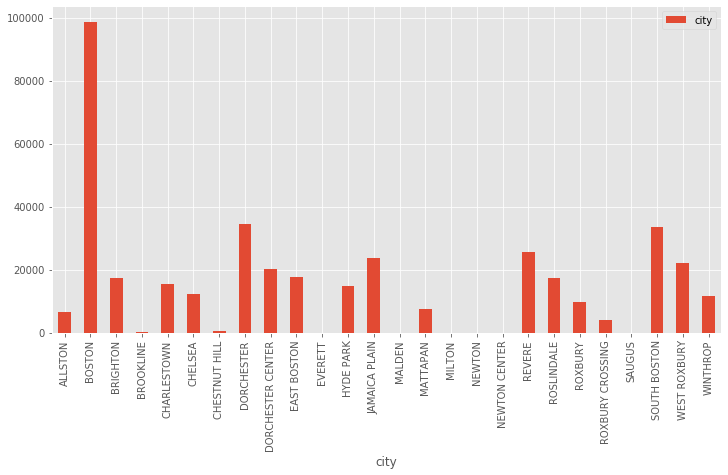

In [58]:
# distribution of data on city
selected_transaction_df[['city']].dropna().groupby(selected_transaction_df["city"].dropna()).count().plot(kind="bar",figsize=(12,6))


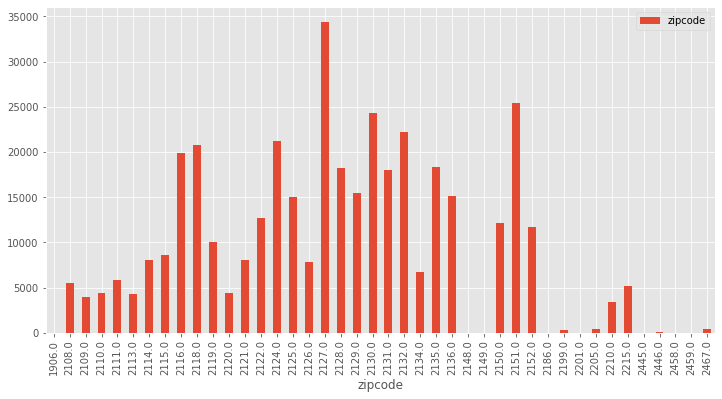

In [60]:
# distribution of data on zipcode
selected_transaction_df[['zipcode']].dropna().groupby(selected_transaction_df["zipcode"].dropna()).count().plot(kind="bar",figsize=(12,6))


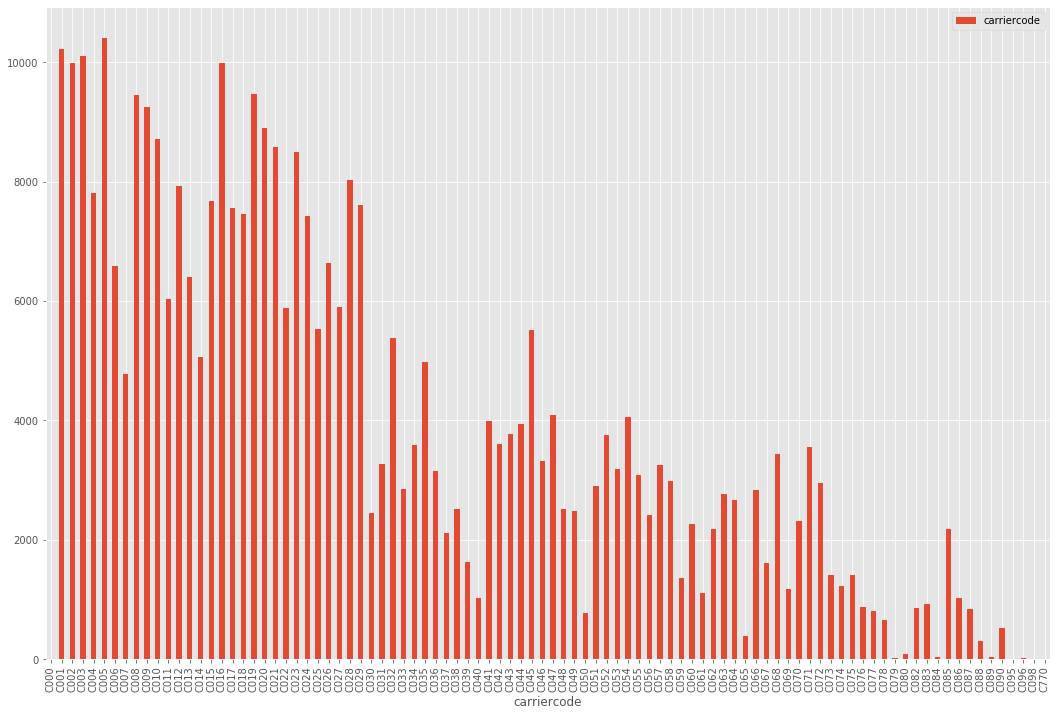

In [62]:
# distribution of data on carriercode
selected_transaction_df[['carriercode']].dropna().groupby(selected_transaction_df["carriercode"].dropna()).count().plot(kind="bar",figsize=(18,12))


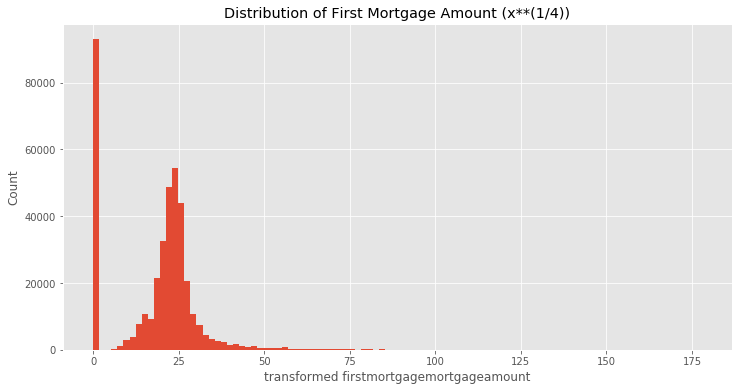

In [72]:
# distribution of data on firstmortgagemortgageamount

plt.figure(figsize=(12, 6))
plt.hist(np.array(selected_transaction_df.firstmortgagemortgageamount)**(1/4), bins=100)
plt.ylabel('Count')
plt.xlabel('transformed firstmortgagemortgageamount')
plt.title('Distribution of First Mortgage Amount (x**(1/4))');

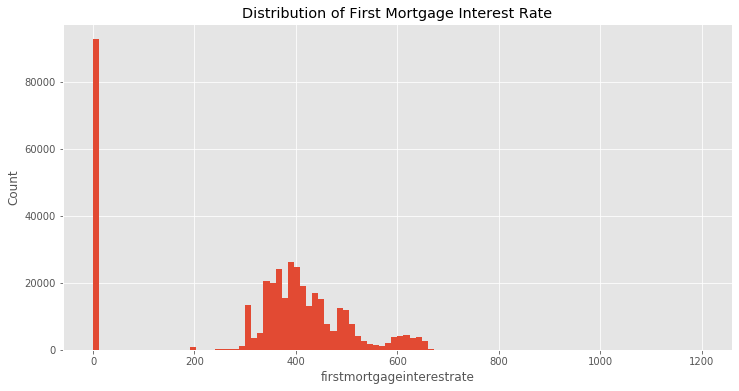

In [74]:
# distribution of data on firstmortgageinterestrate

plt.figure(figsize=(12, 6))
plt.hist(np.array(selected_transaction_df.firstmortgageinterestrate), bins=100)
plt.ylabel('Count')
plt.xlabel('firstmortgageinterestrate')
plt.title('Distribution of First Mortgage Interest Rate');

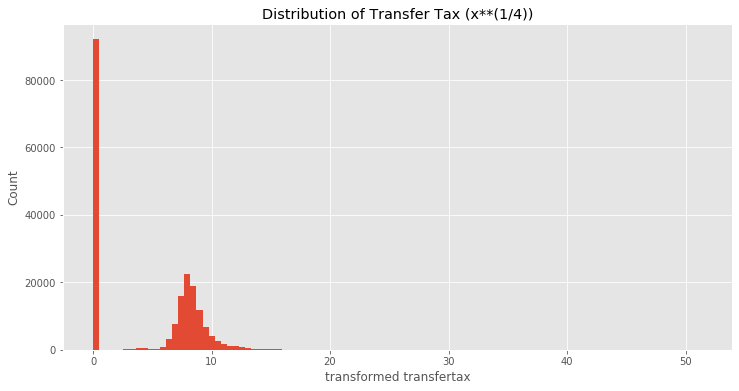

In [77]:
# distribution of data on transfertax

plt.figure(figsize=(12, 6))
plt.hist(np.array(selected_transaction_df.transfertax.dropna()**(1/4)), bins=100)
plt.ylabel('Count')
plt.xlabel('transformed transfertax')
plt.title('Distribution of Transfer Tax (x**(1/4))');